In [15]:
import numpy as np
import utility
import matplotlib.pyplot as plt

from route_activation_solver import RouteActivationSolver

In [2]:
seed = 1543

In [5]:
n = 6
m = 4



In [7]:
instance, xc, yc = utility.generate_vrp_instance(n, seed)

In [8]:
vrp = RouteActivationSolver(n, m, instance)

In [9]:
vrp.solve(solver='leap')

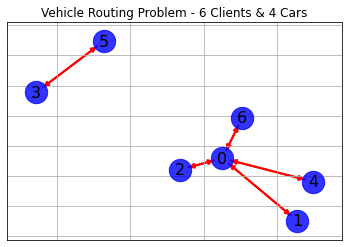

In [10]:
vrp.visualize(xc, yc)

## RAS does not include sub-tour elimination constraint hence we see an extra car (from node 3 to node 5) in this example and two disconnected islands (the car on node 3 and 5 does not originate or return to the depot i.e. node 0 )

## But RAS works fine for the case where number of vehicles is equal to number of clients. 

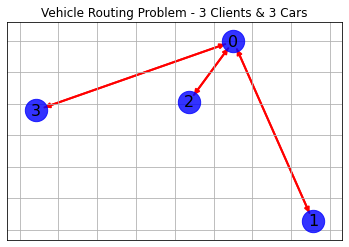

RAS - Optimized Cost: 145.06564049210647




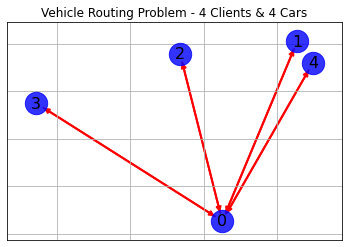

RAS - Optimized Cost: 162.73676058413548




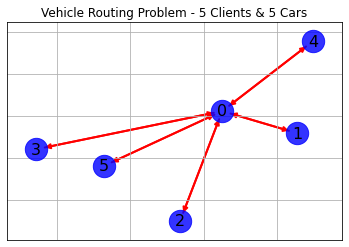

RAS - Optimized Cost: 102.08085455984838




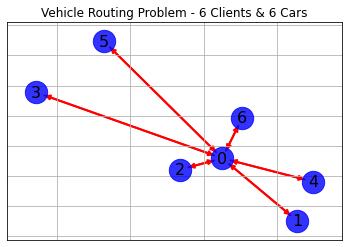

RAS - Optimized Cost: 109.88087756113237




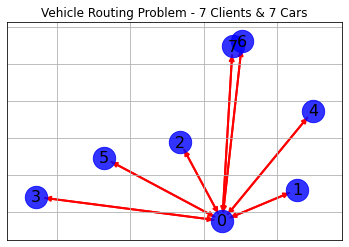

RAS - Optimized Cost: 223.9946879575291




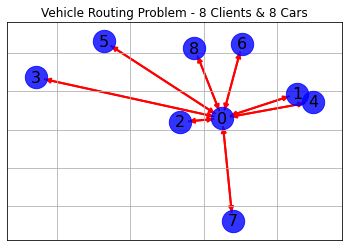

RAS - Optimized Cost: 258.36641109676566




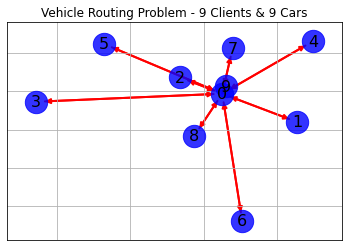

RAS - Optimized Cost: 241.73232423671288




In [11]:
vrp_list = []
for n in range(3,10,1):
    m = n
    instance, xc, yc = utility.generate_vrp_instance(n, seed)
    vrp = RouteActivationSolver(n, m, instance)
    vrp.solve(solver='leap')
    vrp_list.append(vrp)
    vrp.visualize(xc, yc)
    print(f'RAS - Optimized Cost: {vrp.evaluate_vrp_cost()}')
    print('\n')

In [12]:
for vrp in vrp_list:
    print(vrp.timing['qubo_build_time'])

26650.428771972656
34761.19041442871
55170.77445983887
68011.76071166992
98505.73539733887
138779.6401977539
178922.17636108398


In [13]:
for vrp in vrp_list:
    print(vrp.timing['qpu_access_time'])

89479
74144
77436
100359
88910
93596
96912


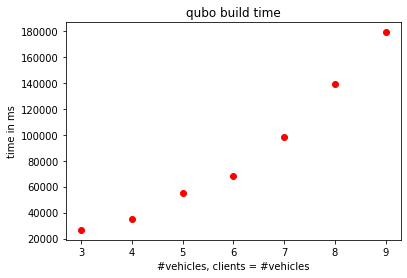

In [30]:
plt.plot(range(3,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


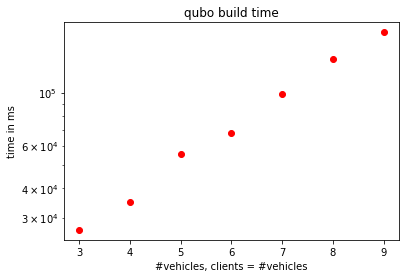

In [29]:
print('using logarithmic scale')
plt.plot(range(3,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.yscale("log")
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()

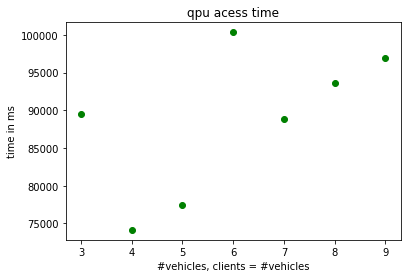

In [28]:
plt.plot(range(3,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


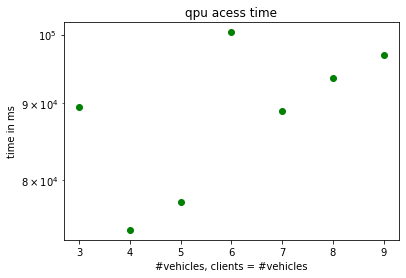

In [27]:
print('using logarithmic scale')
plt.plot(range(3,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.yscale("log")
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()

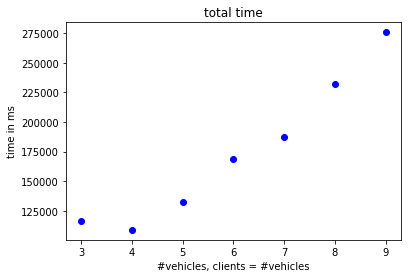

In [26]:
total_time = []
for y in vrp_list:
    t = (y.timing['qpu_access_time'] + y.timing['qubo_build_time'])
    total_time.append(t)


plt.plot(range(3,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


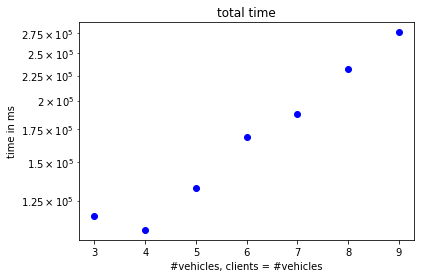

In [25]:
print('using logarithmic scale')
plt.yscale("log")
plt.plot(range(3,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = #vehicles")
plt.ylabel("time in ms")
plt.show()